In [1]:
import dask.dataframe as dd
import pandas as pd

In [2]:
# Load the five csv files into one Dask Dataframe. It should have a 
# length of 1956 rows, and 5 columns
ddf = dd.read_csv("*.csv")

shape = len(ddf), len(ddf.columns)
shape

(1956, 5)

In [3]:
# Use the Dask Dataframe to compute the counts of spam (1005 comments) 
# versus the counts of legitimate comments (951).
ddf['CLASS'].value_counts().compute()

1    1005
0     951
Name: CLASS, dtype: int64

In [4]:
# Spammers often tell people to check out their stuff! When the comments 
# are converted to lowercase, then 461 spam comments contain the word 
# "check", versus only 19 legitimate comments which contain the word 
# "check." Use the Dask Dataframe to compute these counts.

condition = ddf['CONTENT'].str.lower().str.contains('check')

ddf.loc[condition, 'CLASS'].value_counts().compute()

1    461
0     19
Name: CLASS, dtype: int64

In [6]:
ddf['DATE'] = ddf['DATE'].map_partitions(
    pd.to_datetime,format='%Y-%m-%d', meta = ('datetime64[ns]')
)

In [7]:
# Create visualizations with this dataset.
auth_counts = ddf.groupby('AUTHOR')['COMMENT_ID'].count()

In [8]:
auth_counts = auth_counts.compute().sort_values(ascending=False).head(5)

Text(0.5,1,'Count of Comments by Top 5 Authors')

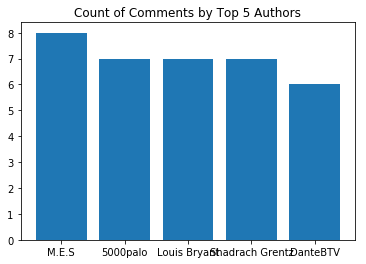

In [11]:
import matplotlib.pyplot as plt

plt.bar(auth_counts.index, height=auth_counts.values)
plt.title("Count of Comments by Top 5 Authors")

You've been introduced to a variety of platforms (AWS SageMaker, AWS EMR, Databricks), libraries (Numba, Dask, MapReduce, Spark), and languages (Python, SQL, Scala, Java) that can "scale up" or "scale out" for faster processing of big data.

Write a paragraph comparing some of these technology options. For example, you could describe which technology you may personally prefer to use, in what circumstances, for what reasons.

**Answer**

When data no longer fit within the storage or computational abilities of a single machine, data scientists need solutions to **scale out**. This decision involves tradeoffs that must be considered in context. If a sinlge machine may be viable with hardware upgrades ormore performant code (**scale up**, like by parallel processing), the data scientist should strongly consider doing so. This is because scaling out inherently introduces complexity and sources of error. Scaling up may be feasible with libraries like **Numba**, which reduce Python inefficiencies by converting to machine code.

However, certain business cases demand the capabilities that only scaling out can provide. For example, MapReduce afforded Google an enormous competitve advantage through more performance and fault-resistant computation across many machines. Owners of "big data" have also benefitted greatly from noSQL and newSQL paradigms that enable the efficient querries previously limited to traditional single-server SQL systems.

When scaling up is not viable, the data scientist may look to platforms like **Databricks** (founded by creators of Apache Spark) and **AWS EMR** for relatively low-cost access to distributed systems. **Scala** is the lingua franca of these systems - a statically typed language that compiles to **Java** bytecode.

**Dask** is a library that nicely provides both performant local table operations while also scaling to distributed systems. For these reasons and its API similarities to Pandas, this would be my personal preference when weilding big data.